In [421]:
#importing libraries
import numpy as np
import math
import pandas as pd
import sympy as sym
from sympy import symbols, exp, Function, solve
from scipy import interpolate
import matplotlib.pyplot as plt 
import glob
import scipy.interpolate as interpolate
import sys


%matplotlib inline

#setting precision upto10 digits
np.set_printoptions(precision=20)
np.set_printoptions(suppress=True)

# Material Selection
1. Reinforced Carbon Carbon (RCC)
2. density = 1500-1600 kg/m3
3. thermal conductivity = 10 -60
4. Cp = 0.5 - 1.2
5. Melting point = 2200 °C
6. The thickness was chosen to be 15 cm
7. So weight/m^2 taking 15cmx15 cm depth =  5.2 Kg
8. I have done only for constant values of k 


In [422]:
#initialising param from the TPS material data from Reinforced Carbon Carbon (RCC)
k = 25
alpha = 1.54e-6
e = 0.9
sig = 5.67e-8 
Tm=2473
th = 0.15
n = 101
cfl = 0.15
time = 720

In [423]:
dx = th/(n-1)
dt = cfl*dx*dx/alpha
nt = math.floor(time/dt) +1
dt

0.21915584415584413

In [424]:
x = np.linspace(0,th,n)
T = 300*np.ones(n,dtype=float)
x101 = x

In [425]:
def h(t):
    if t<=200 and t>=0:
        return 4000*t+2e5
    elif t>200 and t<=560:
        return 1e6
    elif t>560 and t<640:
        return 57.6e5 - 0.085e5 * t
    elif t>=640:
        return 3.2e5

In [426]:
#running the algo, forward time, central difference approach and saving temperature at  half leangth in Thalf
f100 = 0
f200 = 0
f300 =0
f450 = 0
f550 = 0
f650 =0 
f720 = 0
Thalf = np.zeros(nt)
tarray = np.zeros(nt)
for i in range(nt):
    tarray[i] = i*dt 
    T1 = T;
    for j in range(1,n-1):
        T[j] = T[j] + cfl*(T[j+1] - 2*T[j] + T[j-1]) 
        
    T[0] = T[1] + dx*( h(dt*(i)) - sig*(T1[0]**4) )/k

    T[n-1] = T[n - 2];
    Thalf[i] = T[math.floor(n/2)]
    maxm  = -100
    ind = -1
    
    if dt*i>=100 and f100 == 0:
        f100= 1
        T100 = np.copy(T)
        #print(T100)
    if dt*i>=200 and f200 == 0:
        f200= 1
        T200 = np.copy(T)
       # print(T)
    if dt*i>=300 and f300 == 0:
        f300= 1
        T300 = np.copy(T)
        #print(T)
    if dt*i>=450 and f450 == 0:
        f450= 1
        T450 = np.copy(T)
        #print(T)
    if dt*i>=550 and f550 == 0:
        f550= 1
        T550 = np.copy(T)
        #print(T)
    if dt*i>=650 and f650 == 0:
        f650= 1
        T650 = np.copy(T)
        #print(T)
    if dt*i>=720 and f720 == 0:
        f720= 1
        T720 = np.copy(T)
        #print(T)   
    for j in range(len(T)):
        if T[j] > maxm:
            maxm = T[j]
            ind = j
            
    if maxm >= Tm:
        print("Error TPS Melted at (x,t) =")
        print(x[ind])
        print(i*dt)
        break
    if T[n-1] >= 310:
        print("Inner layer temperature exceeds 310 at (temp,time) =")
        print(T[n-1])
        print(dt*i)
        break
T

array([1180.746817023911  , 1168.1622760238956 , 1154.6599491060067 ,
       1140.3713773015222 , 1125.303308411215  , 1109.472405244755  ,
       1092.9048154609952 , 1075.635571963404  , 1057.707844221347  ,
       1039.1720644854838 , 1020.0849554335937 , 1000.5084872695172 ,
        980.5087927058424 ,  960.1550676453702 ,  939.5184838370433 ,
        918.6711374546127 ,  897.6850545921359 ,  876.6312712653076 ,
        855.5790018313344 ,  834.5949059662225 ,  813.742460626141  ,
        793.0814399070244 ,  772.6675025162414 ,  752.5518837662478 ,
        732.7811866482577 ,  713.3972646721558 ,  694.4371877702176 ,
        675.9332816384065 ,  657.913230394558  ,  640.4002323194851 ,
        623.4131986584529 ,  606.966985936011  ,  591.0726529156759 ,
        575.7377341587669 ,  560.9665230498949 ,  546.7603581125945 ,
        533.1179073971452 ,  520.035446651174  ,  507.50712785721714,
        495.52523552227376,  484.08042882111516,  473.16196832195055,
        462.75792655

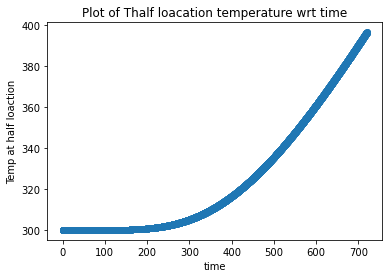

In [427]:
#plotting the Thalf temperature for all time 
plt.scatter(tarray,Thalf)
plt.xlabel("time")
plt.ylabel("Temp at half loaction")
plt.title("Plot of Thalf loacation temperature wrt time")

plt.show()

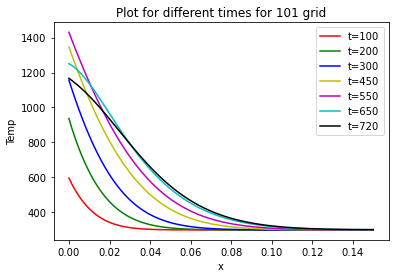

In [428]:
#plotting with matplotlib library on the same graph for different time
plt.plot(x,T100,color='r', label='t=100')
plt.plot(x,T200,color='g', label='t=200')
plt.plot(x,T300,color='b', label='t=300')
plt.plot(x,T450,color='y', label='t=450')
plt.plot(x,T550,color='m', label='t=550')
plt.plot(x,T650,color='c', label='t=650')
plt.plot(x,T720,color='k', label='t=720')


plt.xlabel("x")
plt.ylabel("Temp")
plt.title("Plot for different times for 101 grid")
plt.legend()
plt.show()

# Grid INdependence

In [429]:
#running same code for 301 grid points and saving the values
n = 301
dx = th/(n-1)
dt = cfl*dx*dx/alpha
nt = math.floor(time/dt) +1
x = np.linspace(0,th,n)
x301 = x
T = 300*np.ones(n,dtype=float)
f100_2 = 0
f200_2 = 0
f300_2 =0
f450_2 = 0
f550_2 = 0
f650_2 =0 
f720_2 = 0
for i in range(nt+10):
    T1 = T;
    for j in range(1,n-1):
        T[j] = T[j] + cfl*(T[j+1] - 2*T[j] + T[j-1]) 
        
    T[0] = T[1] + dx*( h(dt*(i)) - sig*(T1[0]**4) )/k

    T[n-1] = T[n - 2];
    
    maxm  = -100
    ind = -1
    
    if dt*i>=100 and f100_2 == 0:
        f100_2= 1
        T100_2 = np.copy(T)
        #print(T100)
    if dt*i>=200 and f200_2 == 0:
        f200_2= 1
        T200_2 = np.copy(T)
       # print(T)
    if dt*i>=300 and f300_2 == 0:
        f300_2= 1
        T300_2 = np.copy(T)
        #print(T)
    if dt*i>=450 and f450_2 == 0:
        f450_2= 1
        T450_2 = np.copy(T)
        #print(T)
    if dt*i>=550 and f550_2 == 0:
        f550_2= 1
        T550_2 = np.copy(T)
        #print(T)
    if dt*i>=650 and f650_2 == 0:
        f650_2= 1
        T650_2 = np.copy(T)
        #print(T)
    if dt*i>=720 and f720_2 == 0:
        f720_2= 1
        T720_2 = np.copy(T)
        #print(T)
        
    for j in range(len(T)):
        if T[j] > maxm:
            maxm = T[j]
            ind = j
            
    if maxm >= Tm:
        print("Error TPS Melted at (x,t) =")
        print(x[ind])
        print(i*dt)
        break
    if T[n-1] >= 310:
        print("Inner layer temperature exceeds 310 at (temp,time) =")
        print(T[n-1])
        print(dt*i)
        break

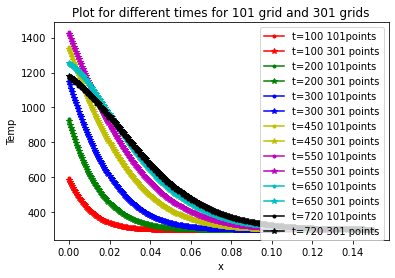

In [430]:
#grid independece
#plot for time 100 200 300 450 550 650 720 for 101 grid points and fro 301 grid poinnts on the same graph
plt.plot(x101,T100,color='r',marker = '.', label='t=100 101points')
plt.plot(x301,T100_2,color='r',marker = '*', label='t=100 301 points')
plt.plot(x101,T200,color='g',marker = '.', label='t=200 101points')
plt.plot(x301,T200_2,color='g',marker = '*', label='t=200 301 points')
plt.plot(x101,T300,color='b',marker = '.', label='t=300 101points')
plt.plot(x301,T300_2,color='b',marker = '*', label='t=300 301 points')
plt.plot(x101,T450,color='y',marker = '.', label='t=450 101points')
plt.plot(x301,T450_2,color='y',marker = '*', label='t=450 301 points')
plt.plot(x101,T550,color='m',marker = '.', label='t=550 101points')
plt.plot(x301,T550_2,color='m',marker = '*', label='t=550 301 points')
plt.plot(x101,T650,color='c',marker = '.', label='t=650 101points')
plt.plot(x301,T650_2,color='c',marker = '*', label='t=650 301 points')
plt.plot(x101,T720,color='k',marker = '.', label='t=720 101points')
plt.plot(x301,T720_2,color='k',marker = '*', label='t=720 301 points')


plt.xlabel("x")
plt.ylabel("Temp")
plt.title("Plot for different times for 101 grid and 301 grids")
plt.legend()
plt.show()

# Turning raditaion off  and comparing values at Thalf

In [431]:
#running same code by turning radiation off
n = 101
Thalf2 = np.zeros(nt)
tarray2 = np.zeros(nt)
dx = th/(n-1)
dt = cfl*dx*dx/alpha
nt = math.floor(time/dt) +1
x = np.linspace(0,th,n)
x301 = x
T = 300*np.ones(n,dtype=float)
f100_2 = 0
f200_2 = 0
f300_2 =0
f450_2 = 0
f550_2 = 0
f650_2 =0 
f720_2 = 0
for i in range(nt):
    tarray2[i] = i*dt
    T1 = T;
    for j in range(1,n-1):
        T[j] = T[j] + cfl*(T[j+1] - 2*T[j] + T[j-1]) 
        
    T[0] = T[1] + dx*( h(dt*(i)))/k

    T[n-1] = T[n - 2];
    
    Thalf2[i] = T[math.floor(n/2)]
    maxm  = -100
    ind = -1
    
    if dt*i>=100 and f100_2 == 0:
        f100_2= 1
        T100_2 = np.copy(T)
        #print(T100)
    if dt*i>=200 and f200_2 == 0:
        f200_2= 1
        T200_2 = np.copy(T)
       # print(T)
    if dt*i>=300 and f300_2 == 0:
        f300_2= 1
        T300_2 = np.copy(T)
        #print(T)
    if dt*i>=450 and f450_2 == 0:
        f450_2= 1
        T450_2 = np.copy(T)
        #print(T)
    if dt*i>=550 and f550_2 == 0:
        f550_2= 1
        T550_2 = np.copy(T)
        #print(T)
    if dt*i>=650 and f650_2 == 0:
        f650_2= 1
        T650_2 = np.copy(T)
        #print(T)
    if dt*i>=720 and f720_2 == 0:
        f720_2= 1
        T720_2 = np.copy(T)
        #print(T)
        
    for j in range(len(T)):
        if T[j] > maxm:
            maxm = T[j]
            ind = j
            
    if maxm >= Tm:
        print("Error TPS Melted at (x,t) =")
        print(x[ind])
        print(i*dt)
        break
    if T[n-1] >= 310:
        print("Inner layer temperature exceeds 310 at (temp,time) =")
        print(T[n-1])
        print(dt*i)
        break

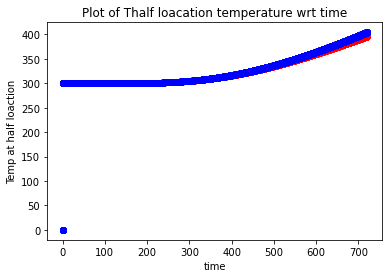

In [432]:
#plotting the Thalf temperature for all time  by switching off radiation
plt.scatter(tarray,Thalf, color = 'r')
plt.scatter(tarray2,Thalf2,color='b')
plt.xlabel("time")
plt.ylabel("Temp at half loaction")
plt.title("Plot of Thalf loacation temperature wrt time")

plt.show()

# END